In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.feature_selection import VarianceThreshold

In [2]:
root = "../../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_pre.csv", index_col=[0])

In [4]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10431,1,2,0,2736.0,0.0,1368.0,1368.0,1368.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
13090,1,2,0,2650.0,0.0,1325.0,1325.0,1325.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
12990,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
19624,46,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
20691,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [5]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42, stratify=y)

___
# Remove constant and quasi-constant features based on the training set

In [7]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(X_train)

features_to_keep = X.columns[selector.get_support()]

X_train = selector.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test = selector.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = features_to_keep

___
# Training a model

In [8]:
clf_xgb = xgb.XGBClassifier(seed=42)
# clf_xgb.fit(X_train, 
#             y_train,
#             verbose=True,
#             ## the next three arguments set up early stopping.
#             early_stopping_rounds=5,
#             eval_metric='mlogloss',
#             eval_set=[(X_test, y_test)])
clf_xgb.fit(X_train, y_train)

C:\Users\pedro\miniconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

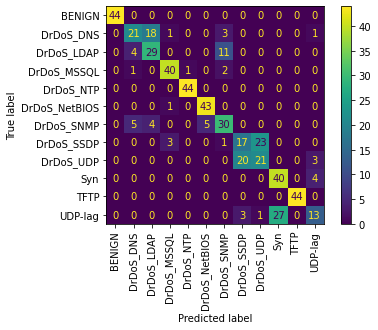

In [9]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test,
                      values_format='d',
                      xticks_rotation='vertical')
plt.savefig(root + 'pictures/multiclass_categorical/cm_basic.png', bbox_inches='tight')

In [10]:
y_pred = clf_xgb.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred, digits=4))

               precision    recall  f1-score   support

       BENIGN     1.0000    1.0000    1.0000        44
    DrDoS_DNS     0.6774    0.4773    0.5600        44
   DrDoS_LDAP     0.5686    0.6591    0.6105        44
  DrDoS_MSSQL     0.8889    0.9091    0.8989        44
    DrDoS_NTP     0.9778    1.0000    0.9888        44
DrDoS_NetBIOS     0.8958    0.9773    0.9348        44
   DrDoS_SNMP     0.6383    0.6818    0.6593        44
   DrDoS_SSDP     0.4250    0.3864    0.4048        44
    DrDoS_UDP     0.4667    0.4773    0.4719        44
          Syn     0.5970    0.9091    0.7207        44
         TFTP     1.0000    1.0000    1.0000        44
      UDP-lag     0.6190    0.2955    0.4000        44

     accuracy                         0.7311       528
    macro avg     0.7295    0.7311    0.7208       528
 weighted avg     0.7295    0.7311    0.7208       528

